In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = sns.color_palette('husl')

In [2]:
df = pd.read_csv('data/contract_awards_in_investment_project_financing_09-10-2024.csv')
df.head()

,As of Date,Fiscal Year,Region,Borrower Country / Economy,Borrower Country / Economy Code,Project ID,Project Name,Project Global Practice,Procurement Category,Procurement Method,WB Contract Number,Contract Description,Borrower Contract Reference Number,Contract Signing Date,Supplier ID,Supplier,Supplier Country / Economy,Supplier Country / Economy Code,Supplier Contract Amount (USD),Review type
0,09-Oct-2024,2020,SOUTH ASIA,Afghanistan,AF,P122235,AF Irrigation Restoration and Development Project,"Agriculture, Fishing and Forestry",Civil Works,Request for Bids,1621166,Abpashak River Bank Protection Scheme in Gresh...,MEW-REF-QR501-LOT1,22-Jan-2020,413420.0,BRIGHT PEARL CONST.CO,Afghanistan,AF,1355819.28,Post
1,09-Oct-2024,2020,SOUTH ASIA,Afghanistan,AF,P125597,Kabul Municipal Development Program,"Transportation;Water, Sanitation and Waste Man...",Civil Works,Request for Bids,1632271,"Upgrading Infrastructure of Gozar 24, Dis. 12 ...",KMDP/W-94/U,21-Jan-2020,491163.0,"HIKMATULLAH KHAN NASIR ROAD, BUILDING & CONSTR...",Afghanistan,AF,649856.99,Post
2,09-Oct-2024,2020,SOUTH ASIA,Afghanistan,AF,P122235,AF Irrigation Restoration and Development Project,"Agriculture, Fishing and Forestry",Goods,Request for Bids,1625013,Supply and Installation of Snow Pack Analyzers...,MEW-REF-G246,21-Jan-2020,427383.0,ASCENT AFG GROUP OF CO CONSTRUCTION & ENGINEERING,Afghanistan,AF,137725.00,Post
3,09-Oct-2024,2020,SOUTH ASIA,Afghanistan,AF,P122235,AF Irrigation Restoration and Development Project,"Agriculture, Fishing and Forestry",Goods,Request for Bids,1625013,Supply and Installation of Snow Pack Analyzers...,MEW-REF-G246,21-Jan-2020,450443.0,RK ENGINEERING CORPORATION,India,IN,137725.00,Post
4,09-Oct-2024,2020,SOUTH ASIA,Afghanistan,AF,P125597,Kabul Municipal Development Program,"Transportation;Water, Sanitation and Waste Man...",Civil Works,Request for Bids,1617803,Upgrading Infrastructure of Tapa e Karte Naw T...,KMDP/W-100/T,21-Jan-2020,490859.0,AFGHAN BUILDERS CONSORTIUM,Afghanistan,AF,649219.82,Post


<Axes: >

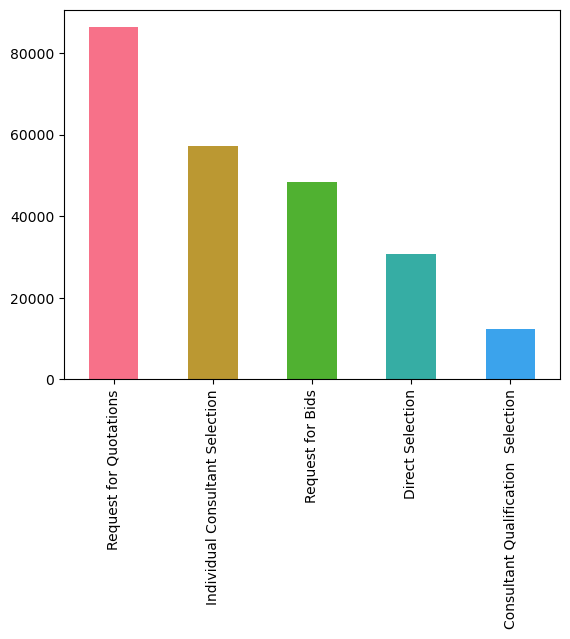

In [3]:


procurment_methods = df['Procurement Method'].value_counts().head(5)
procurment_methods.plot(kind='bar', color=colors)


In [4]:
grouped_df = df.groupby(by = ['Project ID', 'WB Contract Number'])['Supplier Contract Amount (USD)'].sum().reset_index()
display(grouped_df)

,Project ID,WB Contract Number,Supplier Contract Amount (USD)
0,P050529,1540714,97000.00
1,P050529,1541294,80236.13
2,P050529,1541332,79969.00
3,P055120,1545554,901914.00
4,P064836,1545100,4293699.78
...,...,...,...
242435,P507066,1793773,48051.81
242436,P507066,1794892,14257.30
242437,P507066,1795803,1221688.96
242438,P507066,1796335,469908.62


## visuals

In [5]:
new_rows = []
for index, row in df.iterrows():
    if ';' not in str(row['Project Global Practice']):
        new_rows.append(row)
        continue
    practices = str(row['Project Global Practice']).split(';')
    for practice in practices:
        new_row = row.copy()
        new_row['Project Global Practice'] = practice.strip()
        new_rows.append(new_row)

grouped_df = pd.DataFrame(new_rows)

In [6]:
grouped_df['Project Global Practice'].value_counts().head(20)

Agriculture, Fishing and Forestry              97805
Public Administration                          63206
Industry, Trade and Services                   57381
Social Protection                              45651
Water, Sanitation and Waste Management         42964
Education                                      39624
Transportation                                 35993
Health                                         35544
Information and Communications Technologies    31531
Energy and Extractives                         18119
Financial Sector                                6644
Name: Project Global Practice, dtype: int64

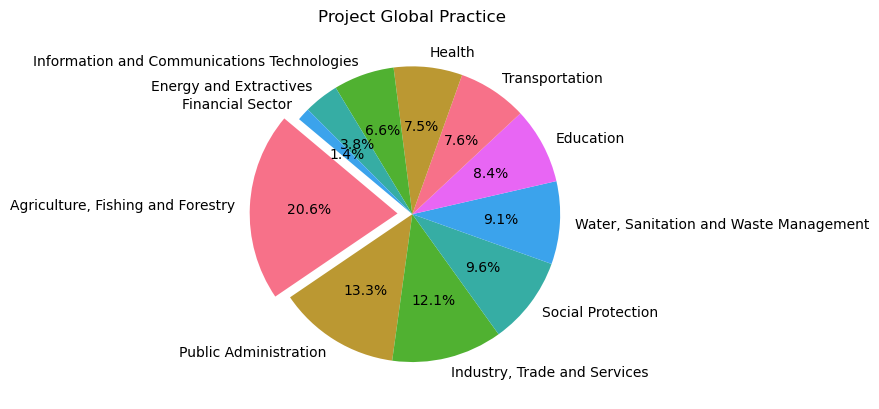

In [7]:

# Get the value counts for the 'Project Global Practice' column
practice_counts = grouped_df['Project Global Practice'].value_counts().head(20)
plt.pie(practice_counts,  labels = practice_counts.index, autopct='%1.1f%%', startangle=140, colors = colors, explode=[0.1 if i == 0 else 0 for i in range(len(practice_counts))])
plt.title('Project Global Practice')
plt.show()


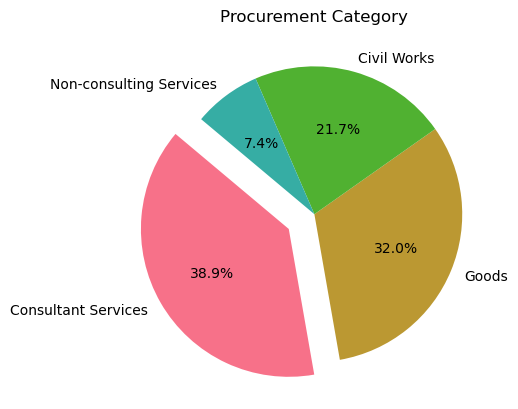

In [8]:
procurment_category_counts = df['Procurement Category'].value_counts().head(20)
plt.pie(procurment_category_counts,  labels = procurment_category_counts.index, autopct='%1.1f%%', startangle=140, colors = colors, explode= (0.2, 0, 0, 0))
plt.title('Procurement Category')
plt.show()

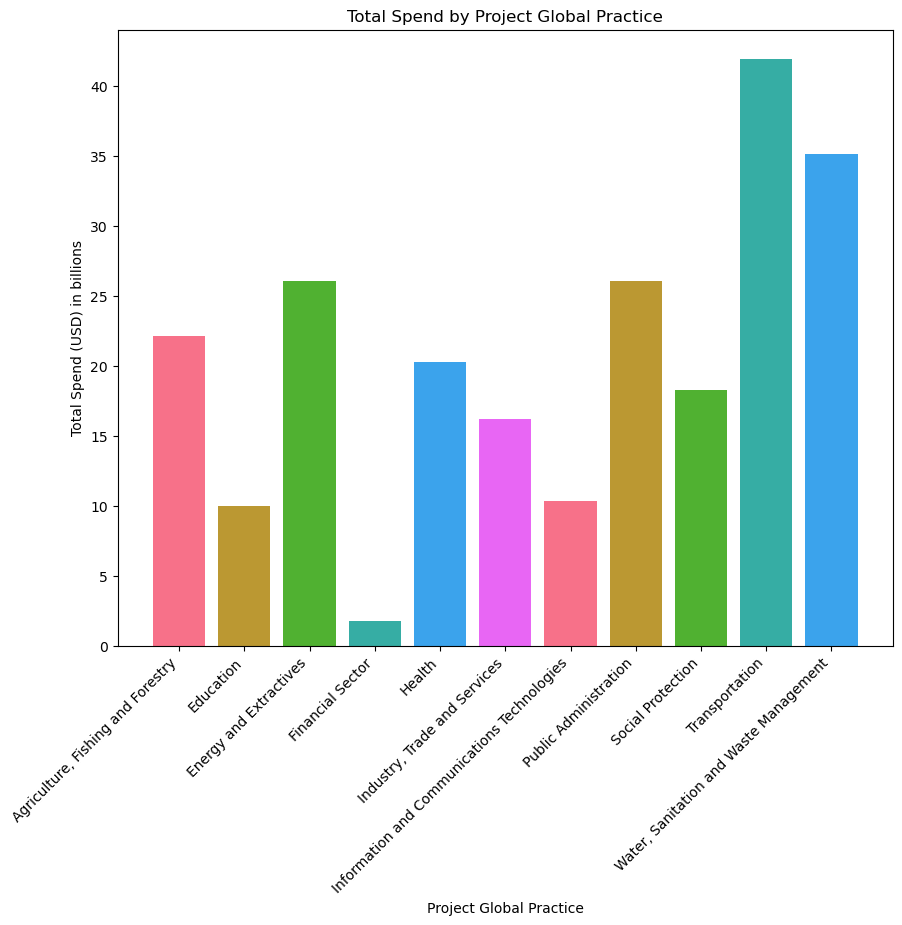

In [9]:

# Grouped by 'Project Global Practice' and sum the 'Supplier Contract Amount (USD)'
grouped_project_global_practice = grouped_df.groupby('Project Global Practice')['Supplier Contract Amount (USD)'].sum().reset_index()

grouped_project_global_practice['Supplier Contract Amount (USD)'] = grouped_project_global_practice['Supplier Contract Amount (USD)'] / 1000000000


# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(grouped_project_global_practice['Project Global Practice'], grouped_project_global_practice['Supplier Contract Amount (USD)'], color = colors)
plt.xlabel('Project Global Practice')
plt.ylabel('Total Spend (USD) in billions')
plt.title('Total Spend by Project Global Practice')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

def multipage(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()



multipage('output.pdf')